<a href="https://colab.research.google.com/github/Shamima21/A-SMOTE-Synthetic-Minority-Oversampling-Technique-/blob/main/Gene%20Selection%20/src/DataTransformation_Methods_Ploting(Q_Q_plot%2C_Distribution_Plot).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler, PowerTransformer
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#train_data = pd.read_csv('/content/sample_data/BrainTumor_CNS Train.csv')
#train_data = pd.read_csv('/content/sample_data/DLBCL_Train.csv')
#train_data = pd.read_csv('/content/sample_data/DLBCL_test.csv')
train_data = pd.read_csv('/content/sample_data/prostate_cancer_preprocessed.csv')
#train_data = pd.read_csv('/content/sample_data/CNS_Train.csv')
#print(train_data.iloc[:, -1])
print(train_data.columns[-1])
#print(train_data)

Class


In [ ]:
# Check and Handling missing values

#check missing values
missing_values = train_data.isnull().sum()

print("Number of missing values in each column:")
print(missing_values)


total_missing = missing_values.sum()
print("\nTotal number of missing values in the DataFrame:", total_missing)


if missing_values.sum() == 0:
    print("No need to handle missing values")
else:

    for column in train_data.columns:
        if train_data[column].dtype == 'object':
            # Fill missing values with the mode for nominal (categorical) columns
            train_data[column].fillna(train_data[column].mode()[0], inplace=True)
        else:
            # Fill missing values with the mean for numerical columns
            train_data[column].fillna(train_data[column].mean(), inplace=True)

    # Verify if missing values are handled
    missing_values_after_fill = train_data.isnull().sum()

    # Print the number of missing values for each column after handling
    print("Number of missing values in each column after handling:")
    print(missing_values_after_fill)

Number of missing values in each column:
1005_at                 0
1007_s_at               0
1008_f_at               0
1009_at                 0
1020_s_at               0
                       ..
AFFX-M27830_3_at        0
AFFX-M27830_5_at        0
AFFX-M27830_M_at        0
AFFX-YEL021w/URA3_at    0
Class                   0
Length: 2136, dtype: int64

Total number of missing values in the DataFrame: 0
No need to handle missing values


In [ ]:
X_Train = train_data.iloc[:, :-1].values
y = train_data['Class']
original_column_names = train_data.columns.tolist()

X_Train_flat = X_Train.flatten()

#Apply minmax
scaler = MinMaxScaler()

X_MinMax = scaler.fit_transform(X_Train)

# Apply Standardize transformation
sc_X = StandardScaler()
X_Standard = sc_X.fit_transform(X_Train)
transformed_data_standard = pd.DataFrame(
    np.hstack((X_Standard, y.values.reshape(-1, 1))),  # Convert y to a NumPy array
    columns=[f'feature_{i}' for i in range(X_Standard.shape[1])] + ['class']
)


# Apply log transformation
x_shift = X_Train - np.min(X_Train) + 1
X_Log = np.log(x_shift)
#np.log(data - np.min(data) + 1)
# Flatten the data to make it 1-dimensional
X_Train_flattened = x_shift.flatten()

#10 bins
bins = np.linspace(np.min(X_Train_flat), np.max(X_Train_flat), 11)
discretized_data = np.digitize(X_Train_flat, bins)


# Apply Yeo-Johnson transformation
power_transformer_yj = PowerTransformer(method='yeo-johnson')
X_YeoJohnson = power_transformer_yj.fit_transform(X_Train)


P_YeoJohnson = X_YeoJohnson

transformed_data_j = pd.DataFrame(
    np.hstack((X_YeoJohnson, y.values.reshape(-1, 1))),  # Convert y to a NumPy array
    columns=original_column_names
)
print(transformed_data_j)
transformed_data_j.to_csv("/content/sample_data/DT_Prostate Cancer_RAW_1.csv", index=False)

#print('Standradize=',X_Standard)
#print('log=', X_Log)
#print(X_BoxCox)
#print('boxcox=',X_BoxCox_original_shape)
#print('YeoJohnson=',X_YeoJohnson)

      1005_at 1007_s_at 1008_f_at   1009_at 1020_s_at    103_at 1030_s_at  \
0    0.607883  0.842329 -1.915875  0.369845  0.782309 -2.172183  1.044478   
1   -1.155069  -0.53991  0.684194 -0.973237 -1.159694 -0.074979 -0.677788   
2    -0.96493 -1.376153  0.684194 -0.497206 -1.027751 -0.326312 -1.504889   
3   -1.006505 -0.454218  0.684194 -1.137012 -1.183824  -0.03819 -1.415002   
4       -1.48 -1.067724  0.684194 -0.143149  -0.87805 -0.137459 -1.316467   
..        ...       ...       ...       ...       ...       ...       ...   
97    1.01903  1.645286  -1.72434  1.969996  1.728589  1.918801  1.318439   
98   0.266908  1.223003  -1.15799  0.298636  0.623959 -0.677131  0.095198   
99   0.967384  2.243551 -1.843098  0.277194  1.742884 -0.395409   0.80417   
100  0.458034  1.813801 -1.856255  0.816136  1.381005 -0.587901  0.856464   
101   1.23651   1.93783 -1.860013  0.498419  1.373708  1.324816  1.612898   

      1037_at   1042_at 1052_s_at  ... AFFX-HSAC07/X00351_M_at  \
0   -2.19

In [ ]:
# Create DataFrames for transformed data
#transformed_data_minmax = pd.DataFrame(np.hstack((X_MinMax, y.reshape(-1, 1))), columns=[f'feature_{i}' for i in range(X_MinMax.shape[1])] + ['class'])
#transformed_data_standard = pd.DataFrame(np.hstack((X_Standard, y.reshape(-1, 1))), columns=[f'feature_{i}' for i in range(X_Standard.shape[1])] + ['class'])
#transformed_discretized = pd.DataFrame(np.hstack((discretized_data, y.reshape(-1, 1))), columns=[f'feature_{i}' for i in range(discretized_data.shape[1])] + ['class'])
#transformed_data_log = pd.DataFrame(np.hstack((X_Log, y.reshape(-1, 1))),
                                   # columns=[f'feature_{i}' for i in range(X_Log.shape[1])] + ['class'])
#transformed_data_boxcox = pd.DataFrame(np.hstack((X_BoxCox_original_shape, y.reshape(-1, 1))),
                                      # columns=[f'feature_{i}' for i in range(X_BoxCox_original_shape.shape[1])] + ['class'])
#transformed_data_yeojohnson = pd.DataFrame(np.hstack((X_YeoJohnson, y.reshape(-1, 1))), columns=[f'feature_{i}' for i in range(X_YeoJohnson.shape[1])] + ['Class'])

# Save DataFrames to CSV files
#transformed_data_standard.to_csv("/content/sample_data/transformed_data_DLBCL Johnson.csv", index=False)
#transformed_data_log.to_csv('transformed_data_log.csv', index=False)
#transformed_data_boxcox.to_csv('transformed_data_boxcox.csv', index=False)
#transformed_data_yeojohnson.to_csv('transformed_data_yeojohnson.csv', index=False)

Text(0.5, 1.0, 'Distribution Plot of RAW Data')

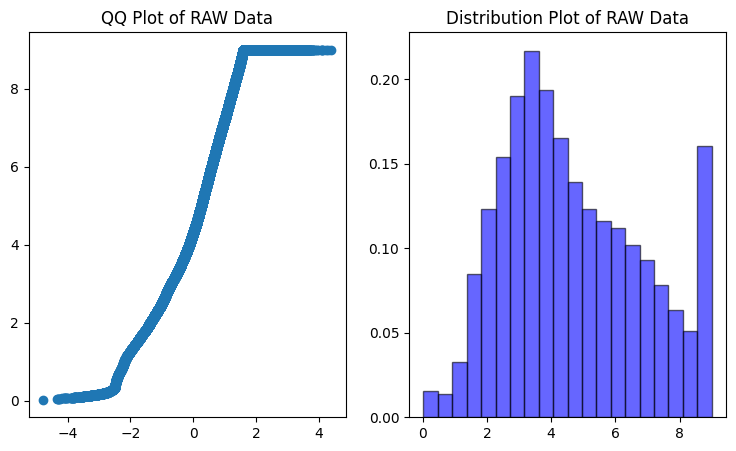

In [ ]:
y_RawPlot  = X_Train.flatten()
x_plot = np.random.normal(loc=0, scale=1, size=X_Train_flat.shape[0])
x_plot.sort()
y_RawPlot.sort()

# QQ plot
plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_plot, y_RawPlot)
plt.title("QQ Plot of RAW Data")

# distribution plot
plt.subplot(1, 2, 2)
plt.hist(y_RawPlot, bins=20, density=True, alpha=0.6, color='b',  edgecolor='black')
plt.title("Distribution Plot of RAW Data")


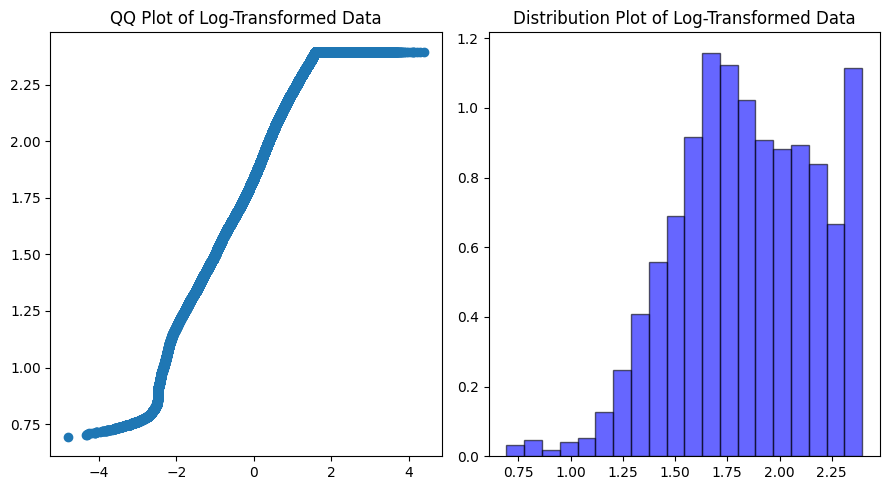

In [ ]:

log_transformed_data = np.log1p(x_shift)

y_LogPlot = log_transformed_data.flatten()
y_LogPlot.sort()



# QQ plot
plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_plot,y_LogPlot)
plt.title("QQ Plot of Log-Transformed Data")

# distribution plot
plt.subplot(1, 2, 2)
plt.hist(y_LogPlot, bins=20, density=True, alpha=0.6, color='b',  edgecolor='black')
plt.title("Distribution Plot of Log-Transformed Data")

plt.tight_layout()
plt.show()

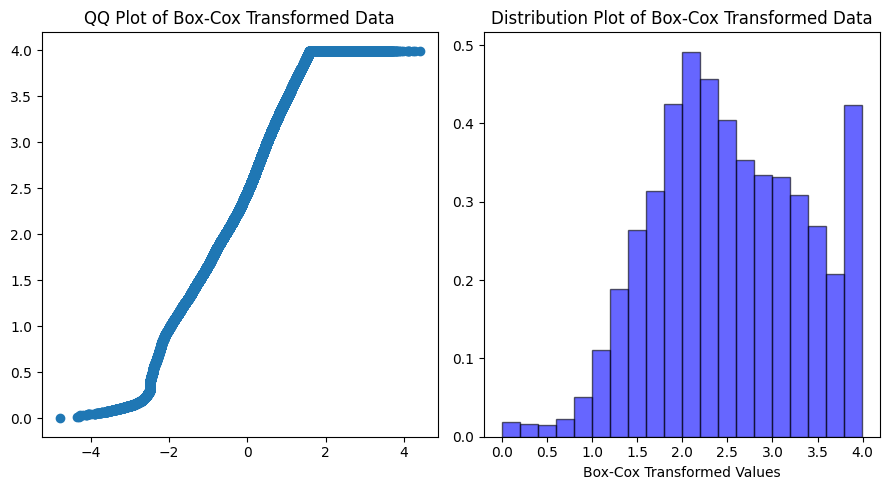

In [ ]:
X_BoxCox, _ = stats.boxcox(X_Train_flattened)
X_BoxCox_original_shape = X_BoxCox.reshape(x_shift.shape)
y_BoxCoxPlot = X_BoxCox.flatten()
y_BoxCoxPlot.sort()

#  QQ plot Box-Cox for Transformation
plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_plot,y_BoxCoxPlot)
#plt.xlabel("Theoretical Quantiles")
#plt.ylabel("Sample Quantiles")
plt.title("QQ Plot of Box-Cox Transformed Data")

# distribution plot for Box-Cox Transformation
plt.subplot(1, 2, 2)
plt.hist(y_BoxCoxPlot, bins=20, density=True, alpha=0.6, color='b',  edgecolor='black')
plt.xlabel("Box-Cox Transformed Values")
plt.title("Distribution Plot of Box-Cox Transformed Data")

plt.tight_layout()
plt.show()

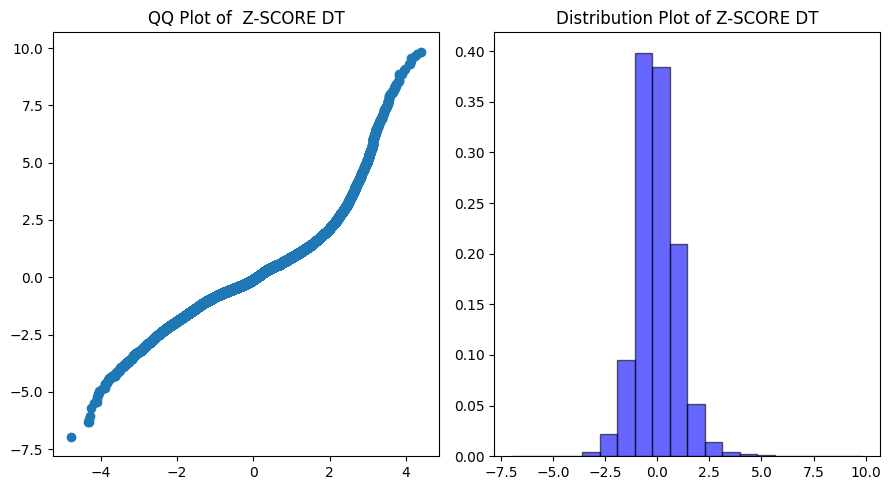

In [ ]:

y_StandPlot = X_Standard.flatten()
y_StandPlot.sort()

# QQ plot for Standardized Data
plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
#plt.plot([min(normal_quantiles), max(normal_quantiles)], [min(normal_quantiles), max(normal_quantiles)], color='red', linestyle='--')
plt.scatter(x_plot, y_StandPlot)
#plt.xlabel("Theoretical Quantiles")
#plt.ylabel("Sample Quantiles")
plt.title("QQ Plot of  Z-SCORE DT")

# distribution plot for Standardized Data
plt.subplot(1, 2, 2)
plt.hist(y_StandPlot, bins=20, density=True, alpha=0.6, color='b',  edgecolor='black')
#plt.xlabel("Standardized Values")
#plt.ylabel("Density")
plt.title("Distribution Plot of Z-SCORE DT")

plt.tight_layout()
plt.show()

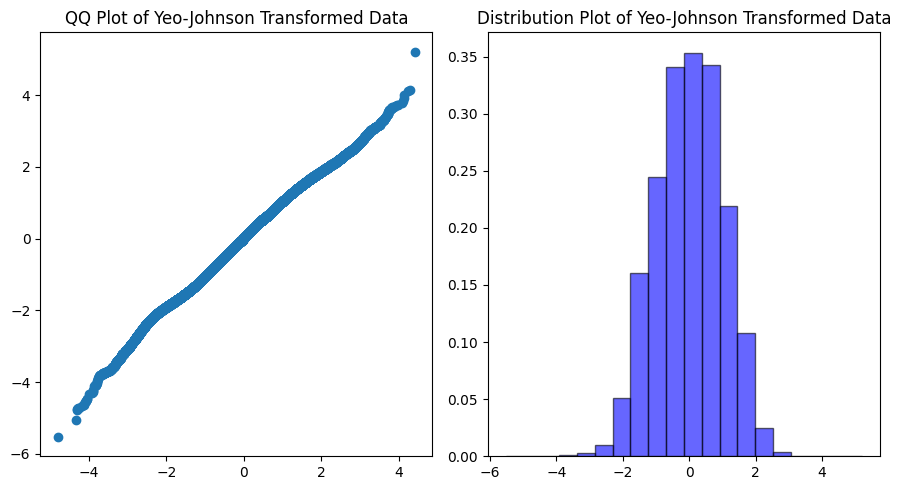

In [ ]:
data_yeojohnson_flat = P_YeoJohnson.flatten()
data_yeojohnson_flat.sort()

#QQ plot for Yeo-Johnson Transformed Data
plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_plot, data_yeojohnson_flat)
#plt.plot([min(normal_quantiles), max(normal_quantiles)], [min(normal_quantiles), max(normal_quantiles)], color='red', linestyle='--')

plt.title("QQ Plot of Yeo-Johnson Transformed Data")

#distribution plot for Yeo-Johnson Transformed Data
plt.subplot(1, 2, 2)
plt.hist(data_yeojohnson_flat, bins=20, density=True, alpha=0.6, color='b',  edgecolor='black')
plt.title("Distribution Plot of Yeo-Johnson Transformed Data")

plt.tight_layout()
plt.show()

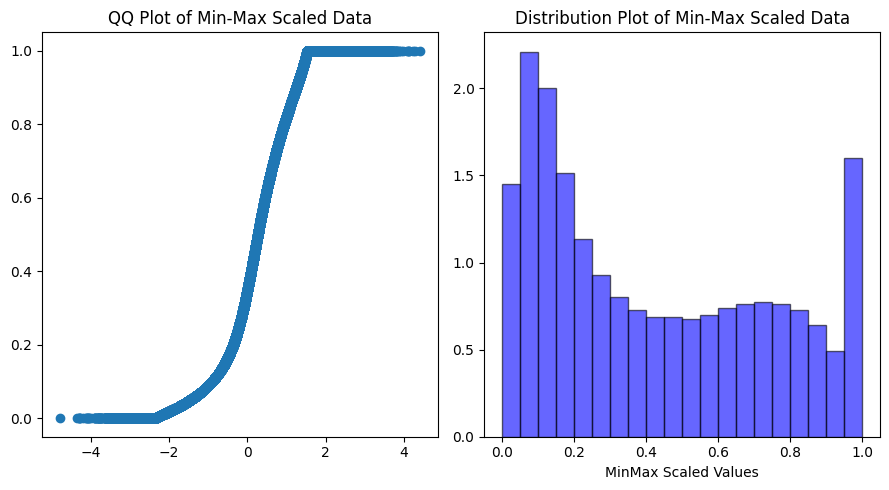

In [ ]:
y_MinmaxPlot = X_MinMax.flatten()
y_MinmaxPlot.sort()

#QQ plot
plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_plot,y_MinmaxPlot)#x_plot random normal quantile distribution sorted value
plt.title("QQ Plot of Min-Max Scaled Data")

#Distribution plot for Min-Max Scaled Data
plt.subplot(1, 2, 2)
plt.hist(y_MinmaxPlot, bins=20, density=True, alpha=0.6, color='b',  edgecolor='black')
plt.xlabel("MinMax Scaled Values")
plt.title("Distribution Plot of Min-Max Scaled Data")

plt.tight_layout()
plt.show()

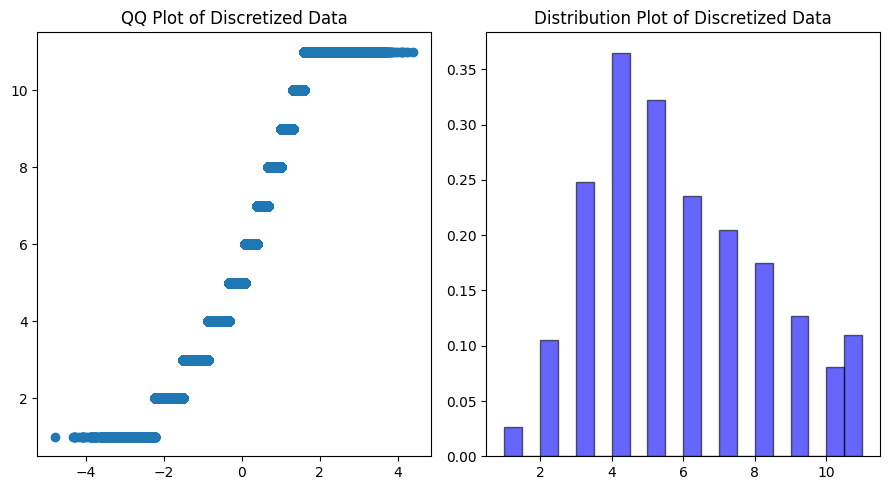

In [ ]:
discretized_data.sort()

#QQ plot for Discretized Data
plt.figure(figsize=(9, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_plot, discretized_data)
plt.title("QQ Plot of Discretized Data")

#Distribution plot for Discretized Data
plt.subplot(1, 2, 2)
plt.hist(discretized_data, bins=20, density=True, alpha=0.6, color='b',  edgecolor='black')
plt.title("Distribution Plot of Discretized Data")

plt.tight_layout()
plt.show()

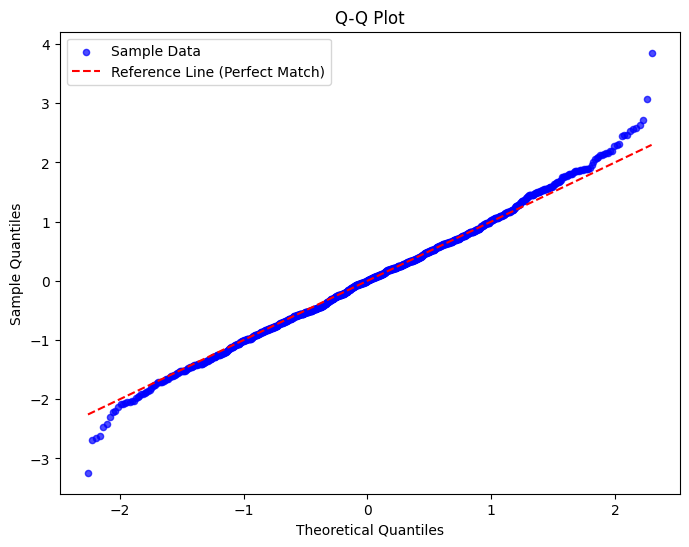

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def qq_plot(data, distribution=stats.norm, dist_params=None, plot_reference_line=True):
    """
    Create a Q-Q plot to compare data to a specified distribution.

    Parameters:
    - data: 1D array-like or iterable
        The sample data to be compared.
    - distribution: scipy.stats distribution object
        The distribution to which you want to compare the data (default: Normal distribution).
    - dist_params: tuple or dict, optional
        Parameters specific to the chosen distribution (e.g., mean and standard deviation).
    - plot_reference_line: bool, optional
        Whether to include a reference line for the perfect match (default: True).

    Returns:
    - None (displays the Q-Q plot)
    """

    # Fit the distribution to the data
    if dist_params is None:
        dist_params = distribution.fit(data)

    # Generate theoretical quantiles
    theoretical_quantiles = distribution.ppf(np.linspace(0.01, 0.99, len(data)), *dist_params)

    # Sort the data
    sorted_data = np.sort(data)

    # Create the Q-Q plot
    plt.figure(figsize=(8, 6))
    plt.scatter(theoretical_quantiles, sorted_data, alpha=0.7, s=20, color='b', label='Sample Data')

    # Add a reference line for a perfect match
    if plot_reference_line:
        plt.plot([min(theoretical_quantiles), max(theoretical_quantiles)],
                 [min(theoretical_quantiles), max(theoretical_quantiles)],
                 linestyle='--', color='r', label='Reference Line (Perfect Match)')

    plt.title('Q-Q Plot')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.legend()

    plt.show()

# Example usage:
np.random.seed(42)
sample_data = np.random.normal(0, 1, 1000)
qq_plot(sample_data)